In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Небольшой описательный анализ

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Проверим на наличие пропусков в данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Выведем названия столбцов

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Еще раз оценим отношение классов целевой переменной

In [6]:
total_transactions = len(df)
normal_transactions = len(df[df['Class'] == 0])
fraudulent_transactions = len(df[df['Class'] == 1])

normal_percentage = (normal_transactions / total_transactions) * 100
fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100

print(f'Обычные: {normal_percentage:.4f}%')
print(f'Мошеннические: {fraudulent_percentage:.4f}%')

Обычные: 99.8273%
Мошеннические: 0.1727%


In [7]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
n_trans = len(df[df['Class'] == 0])
f_trans = len(df[df['Class'] == 1])

### Важно!

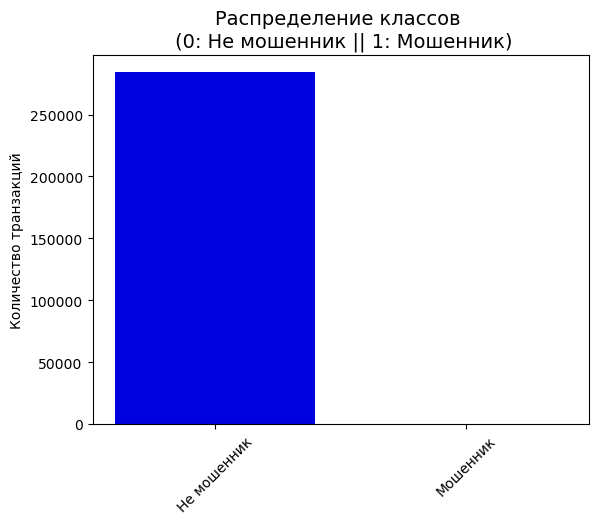

In [9]:
colors = ["#0101DF", "#DF0101"]
plt.bar(['Не мошенник', 'Мошенник'], [n_trans, f_trans], color=colors)
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.show()

### Построим распределение по суммам и времени транзакций

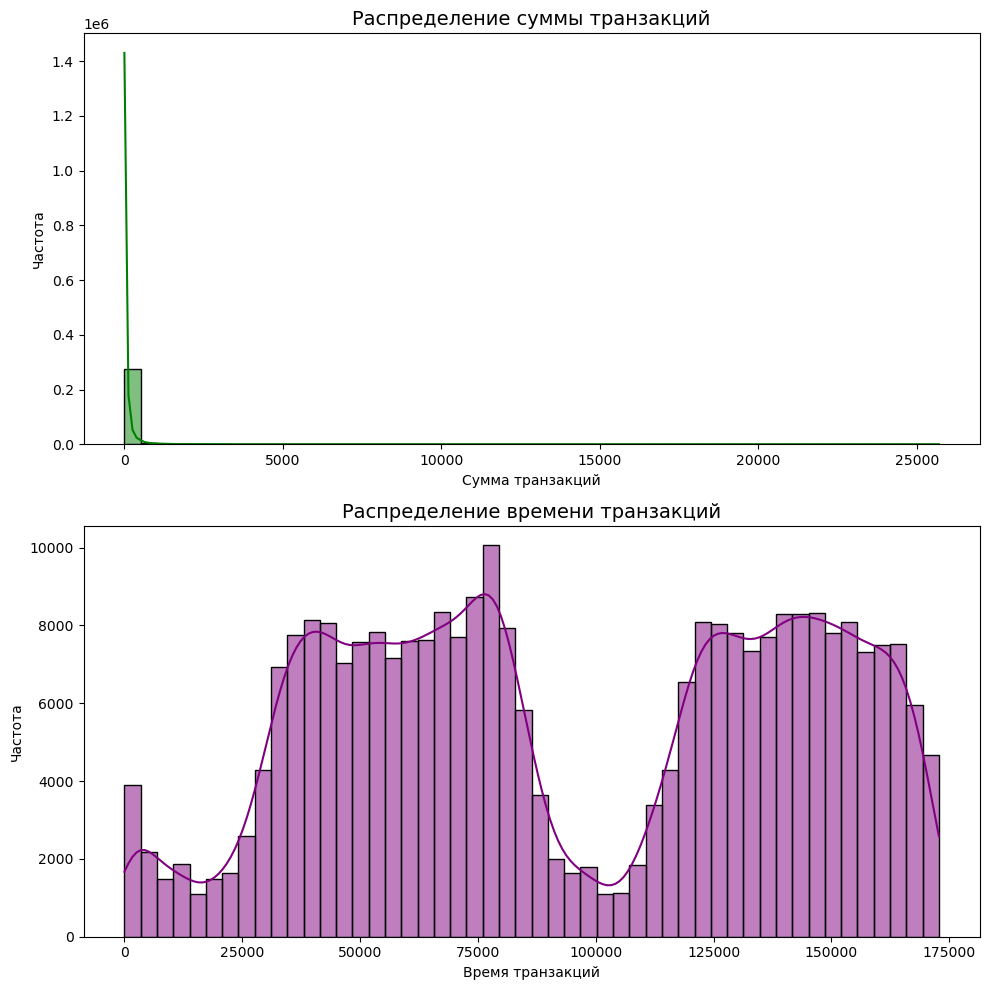

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

#Значения для суммы и времени транзакций
amount_val = df['Amount']
time_val = df['Time']

# Строим график распределения суммы транзакций
sns.histplot(amount_val, bins=50, kde=True, ax=ax[0], color='green')
ax[0].set_title('Распределение суммы транзакций', fontsize=14)
ax[0].set_xlabel('Сумма транзакций')
ax[0].set_ylabel('Частота')

# Строим график распределения времени транзакций
sns.histplot(time_val, bins=50, kde=True, ax=ax[1], color='purple')
ax[1].set_title('Распределение времени транзакций', fontsize=14)
ax[1].set_xlabel('Время транзакций')
ax[1].set_ylabel('Частота')

# Показываем графики
plt.tight_layout()
plt.show()

### Разделение данных

In [14]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# вот последнее представление - как раз то, что нужно для RobustScaler . Преобразовываем так все нужные столбцы.

original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


### Метод Random Under-Sampling

In [15]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249760,154564.0,1.982509,-0.976568,-0.928503,-0.500939,-0.669080,-0.209884,-0.608611,-0.052807,-0.569731,...,-0.321834,-0.508374,0.285269,0.770499,-0.411852,0.452013,-0.053976,-0.042609,74.95,0
94218,64785.0,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,0.940378,-2.558691,...,0.102913,0.311626,-4.129195,0.034639,-1.133631,0.272265,1.841307,-1.796363,720.38,1
120595,75883.0,-0.419618,0.947912,0.484840,0.858661,-0.289066,-0.222021,0.495108,0.416754,-0.930653,...,0.245963,0.449044,0.072359,-0.001779,-0.096886,-0.326688,-0.075887,-0.026680,85.25,0
11841,20332.0,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.00,1
57615,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1


In [16]:
new_df.shape

(984, 31)

Распределение классов в подвыборке


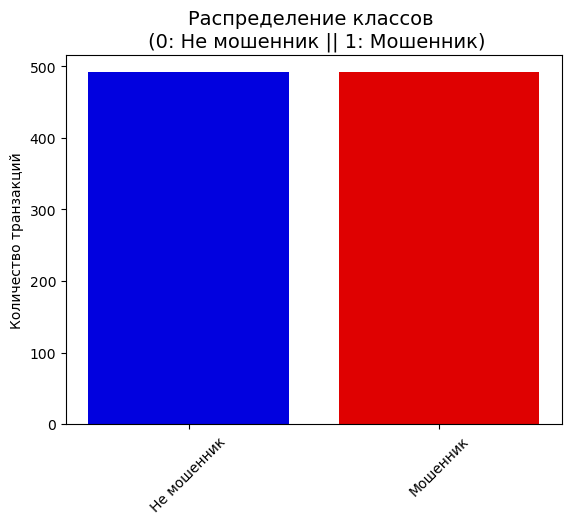

In [18]:
new_n_trans = len(new_df[new_df['Class'] == 0])
new_f_trans = len(new_df[new_df['Class'] == 1])

print('Распределение классов в подвыборке')
# Построение гистограммы
colors = ["#0101DF", "#DF0101"]
plt.bar(['Не мошенник', 'Мошенник'], [new_n_trans, new_f_trans], color=colors)
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.show()

### Матрица корреляций

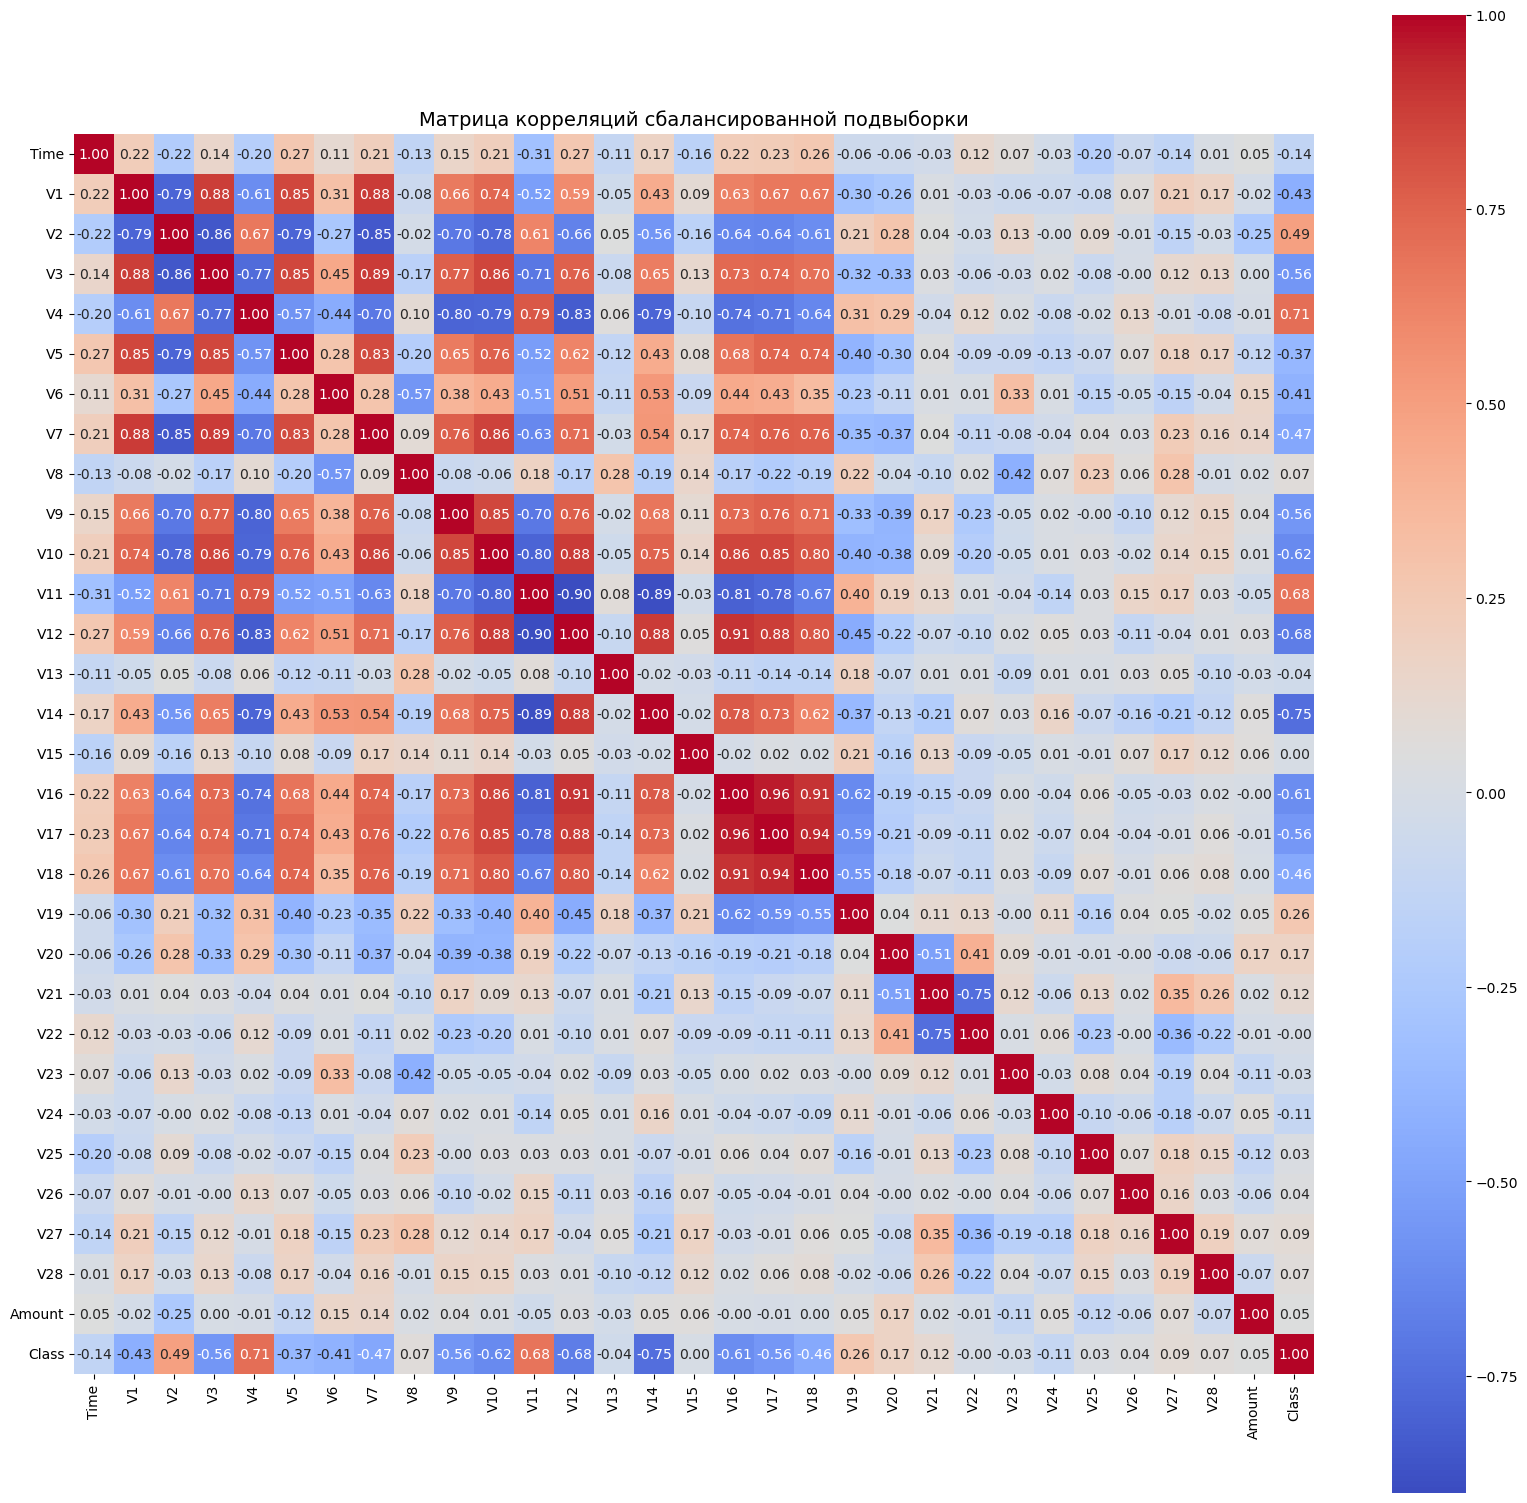

In [19]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, square=True, cbar_kws={"shrink": .8})
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)
plt.show()

#### Построим Boxplot

In [21]:
# Отрицательные корреляции
neg_corr_features = ['V10', 'V12', 'V14', 'V17']
# Положительные корреляции
pos_corr_features = ['V2', 'V4', 'V11', 'V19']

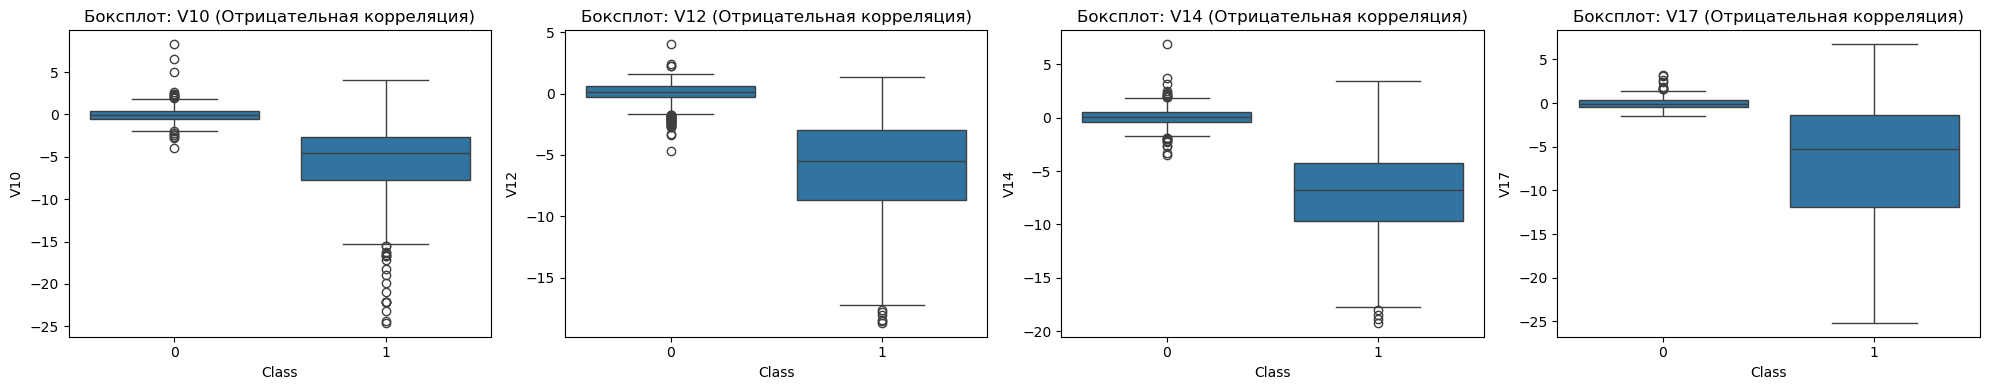

In [22]:
# Создаем подграфики для отрицательных корреляций
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Боксплоты для отрицательных корреляций
for ax, feature in zip(axes, neg_corr_features):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax)
    ax.set_title(f'Боксплот: {feature} (Отрицательная корреляция)')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

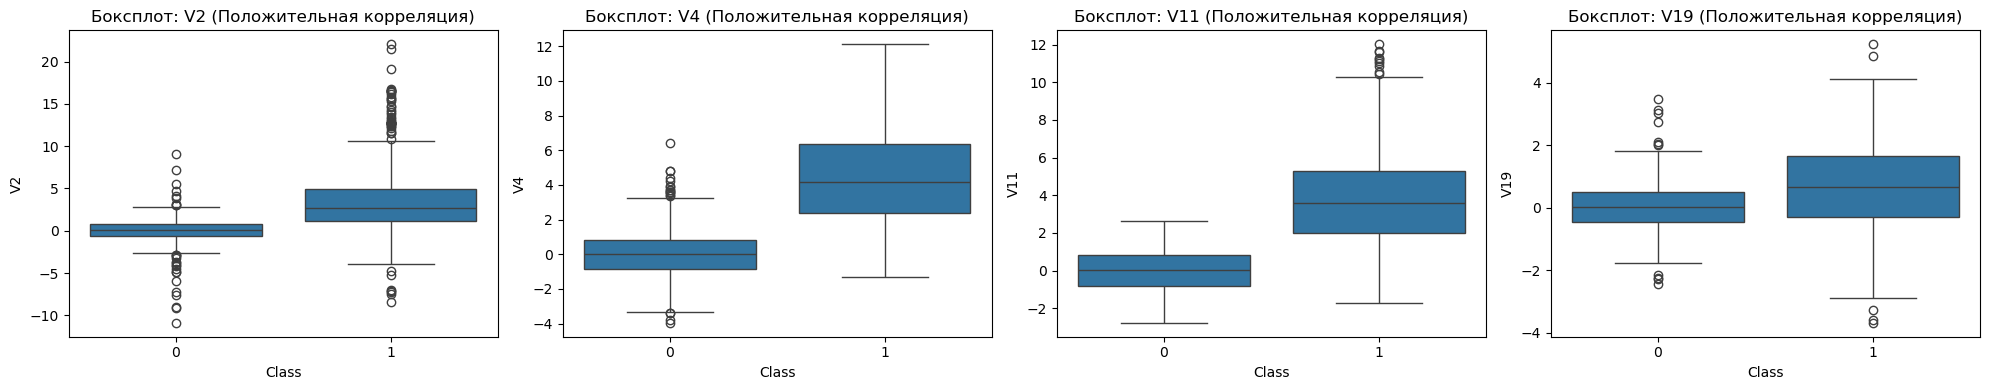

In [23]:
# Создаем подграфики для положительных корреляций
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Боксплоты для отрицательных корреляций
for ax, feature in zip(axes, pos_corr_features):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax)
    ax.set_title(f'Боксплот: {feature} (Положительная корреляция)')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

#### Итого:
##### Строим распределения
##### Определяем порог
##### Удаляем выбросы
##### Строим Boxplot 

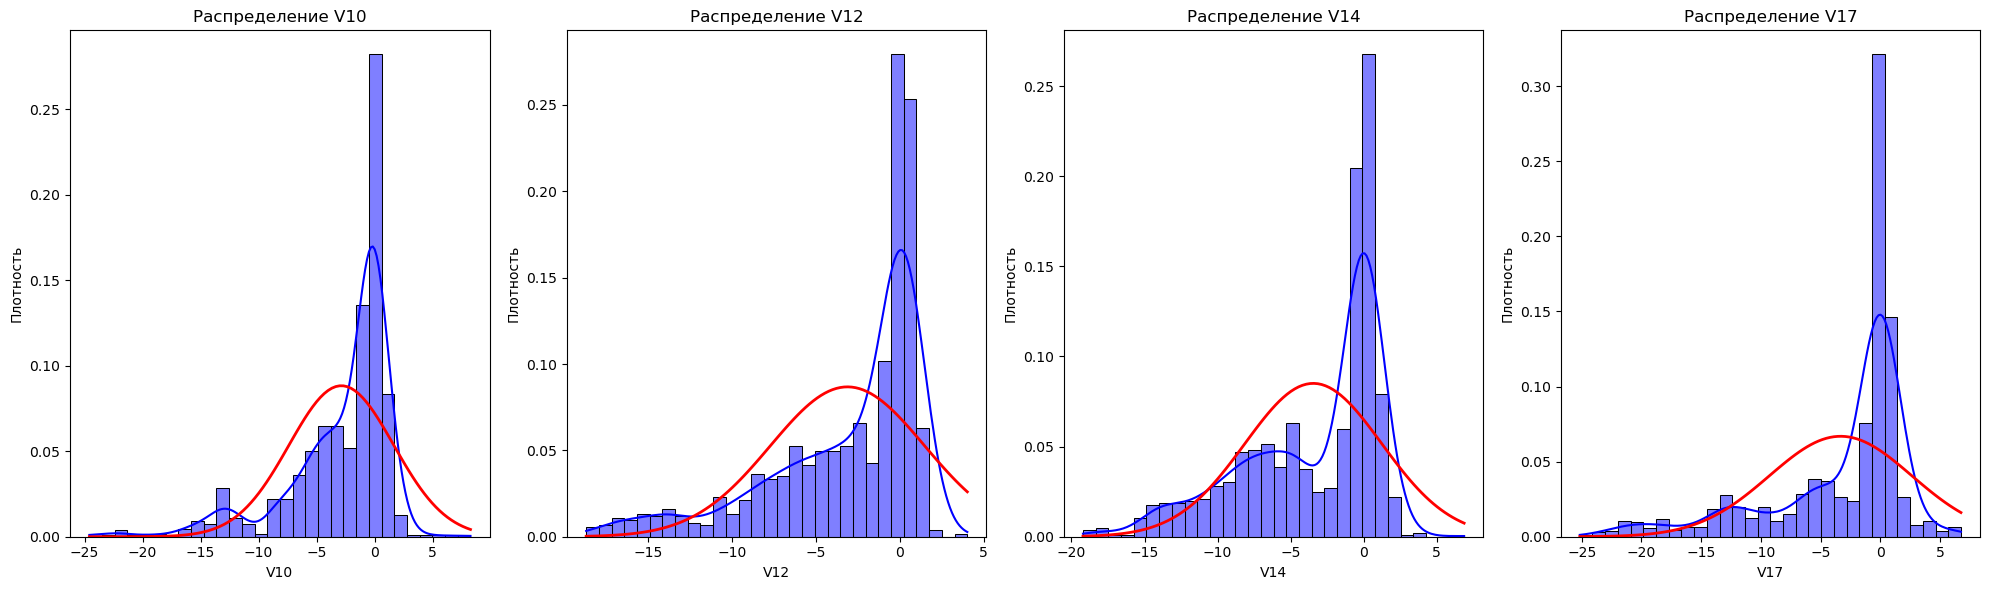

In [25]:
#Строим распределения для признаков с отрицательной корреляцией
from scipy.stats import norm
# Настройка графиков
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

# Строим распределение для каждого признака
for ax, feature in zip((ax1, ax2, ax3, ax4), neg_corr_features):
    # Гистограмма
    sns.histplot(new_df[feature], ax=ax, kde=True, stat="density", color='blue', bins=30)

    # Кривая нормального распределения
    mu, std = norm.fit(new_df[feature])
    x = np.linspace(new_df[feature].min(), new_df[feature].max(), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Настройка заголовка и меток
    ax.set_title(f'Распределение {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Плотность')

plt.tight_layout()
plt.show()

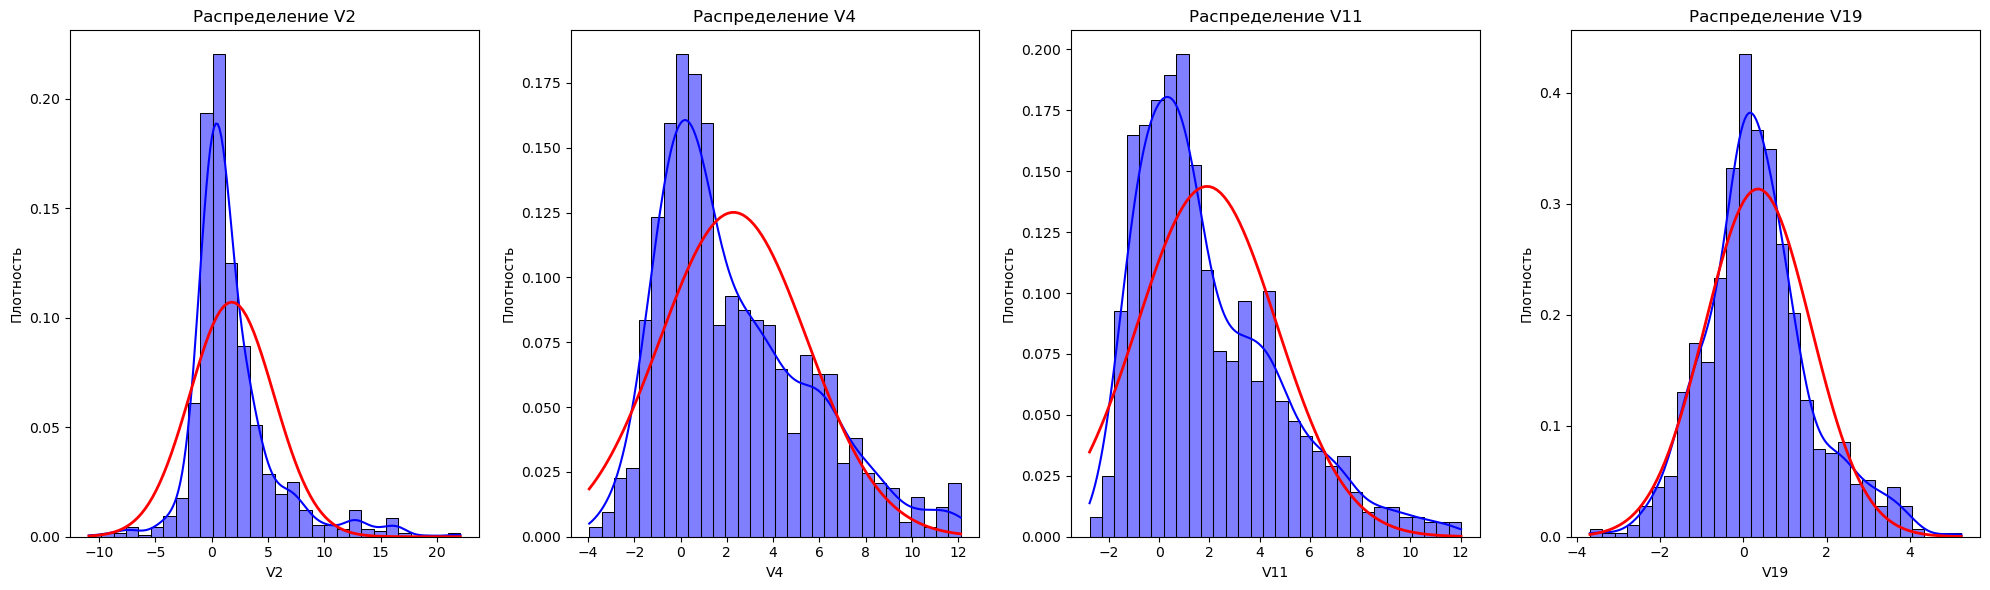

In [26]:
# Строим распределения для признаков с положительной корреляцией
from scipy.stats import norm
# Настройка графиков
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

# Строим распределение для каждого признака
for ax, feature in zip((ax1, ax2, ax3, ax4), pos_corr_features):
    # Гистограмма
    sns.histplot(new_df[feature], ax=ax, kde=True, stat="density", color='blue', bins=30)

    # Кривая нормального распределения
    mu, std = norm.fit(new_df[feature])
    x = np.linspace(new_df[feature].min(), new_df[feature].max(), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Настройка заголовка и меток
    ax.set_title(f'Распределение {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Плотность')

plt.tight_layout()
plt.show()

In [27]:
# Функция для удаления выбросов
def remove_outliers(df, feature, target_class):
    # Извлечение значений признака для целевого класса
    feature_values = df[feature].loc[df['Class'] == target_class].values

    # Вычисление квартилей и межквартильного размаха (IQR)
    q25, q75 = np.percentile(feature_values, 25), np.percentile(feature_values, 75)
    iqr = q75 - q25

    # Определение порогов выбросов
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off

    # Удаление выбросов
    outliers = df[(df[feature] > upper_bound) | (df[feature] < lower_bound)].index
    df_without_outliers = df.drop(outliers)

    print(f'Для признака {feature}:')
    print(f'Квартиль 25: {q25} | Квартиль 75: {q75}')
    print(f'IQR: {iqr}')
    print(f'Порог: {cut_off}')
    print(f'{feature} нижняя граница: {lower_bound}')
    print(f'{feature} верхняя граница: {upper_bound}')
    print(f'Количество выбросов: {len(outliers)}')
    print('----' * 20)

    return df_without_outliers

In [29]:
df_without_outliers = new_df.copy()

for col in pos_corr_features + neg_corr_features:
    df_without_outliers = remove_outliers(df_without_outliers, col, 1)

Для признака V2:
Квартиль 25: 1.1882258198658224 | Квартиль 75: 4.9712573249056025
IQR: 3.78303150503978
Порог: 5.67454725755967
V2 нижняя граница: -4.486321437693848
V2 верхняя граница: 10.645804582465273
Количество выбросов: 55
--------------------------------------------------------------------------------
Для признака V4:
Квартиль 25: 2.232581359919345 | Квартиль 75: 6.070560404747405
IQR: 3.8379790448280597
Порог: 5.756968567242089
V4 нижняя граница: -3.5243872073227442
V4 верхняя граница: 11.827528971989494
Количество выбросов: 7
--------------------------------------------------------------------------------
Для признака V11:
Квартиль 25: 1.90399926160786 | Квартиль 75: 5.26786160380362
IQR: 3.3638623421957603
Порог: 5.04579351329364
V11 нижняя граница: -3.14179425168578
V11 верхняя граница: 10.31365511709726
Количество выбросов: 10
--------------------------------------------------------------------------------
Для признака V19:
Квартиль 25: -0.415741147664133 | Квартиль 75: 1.

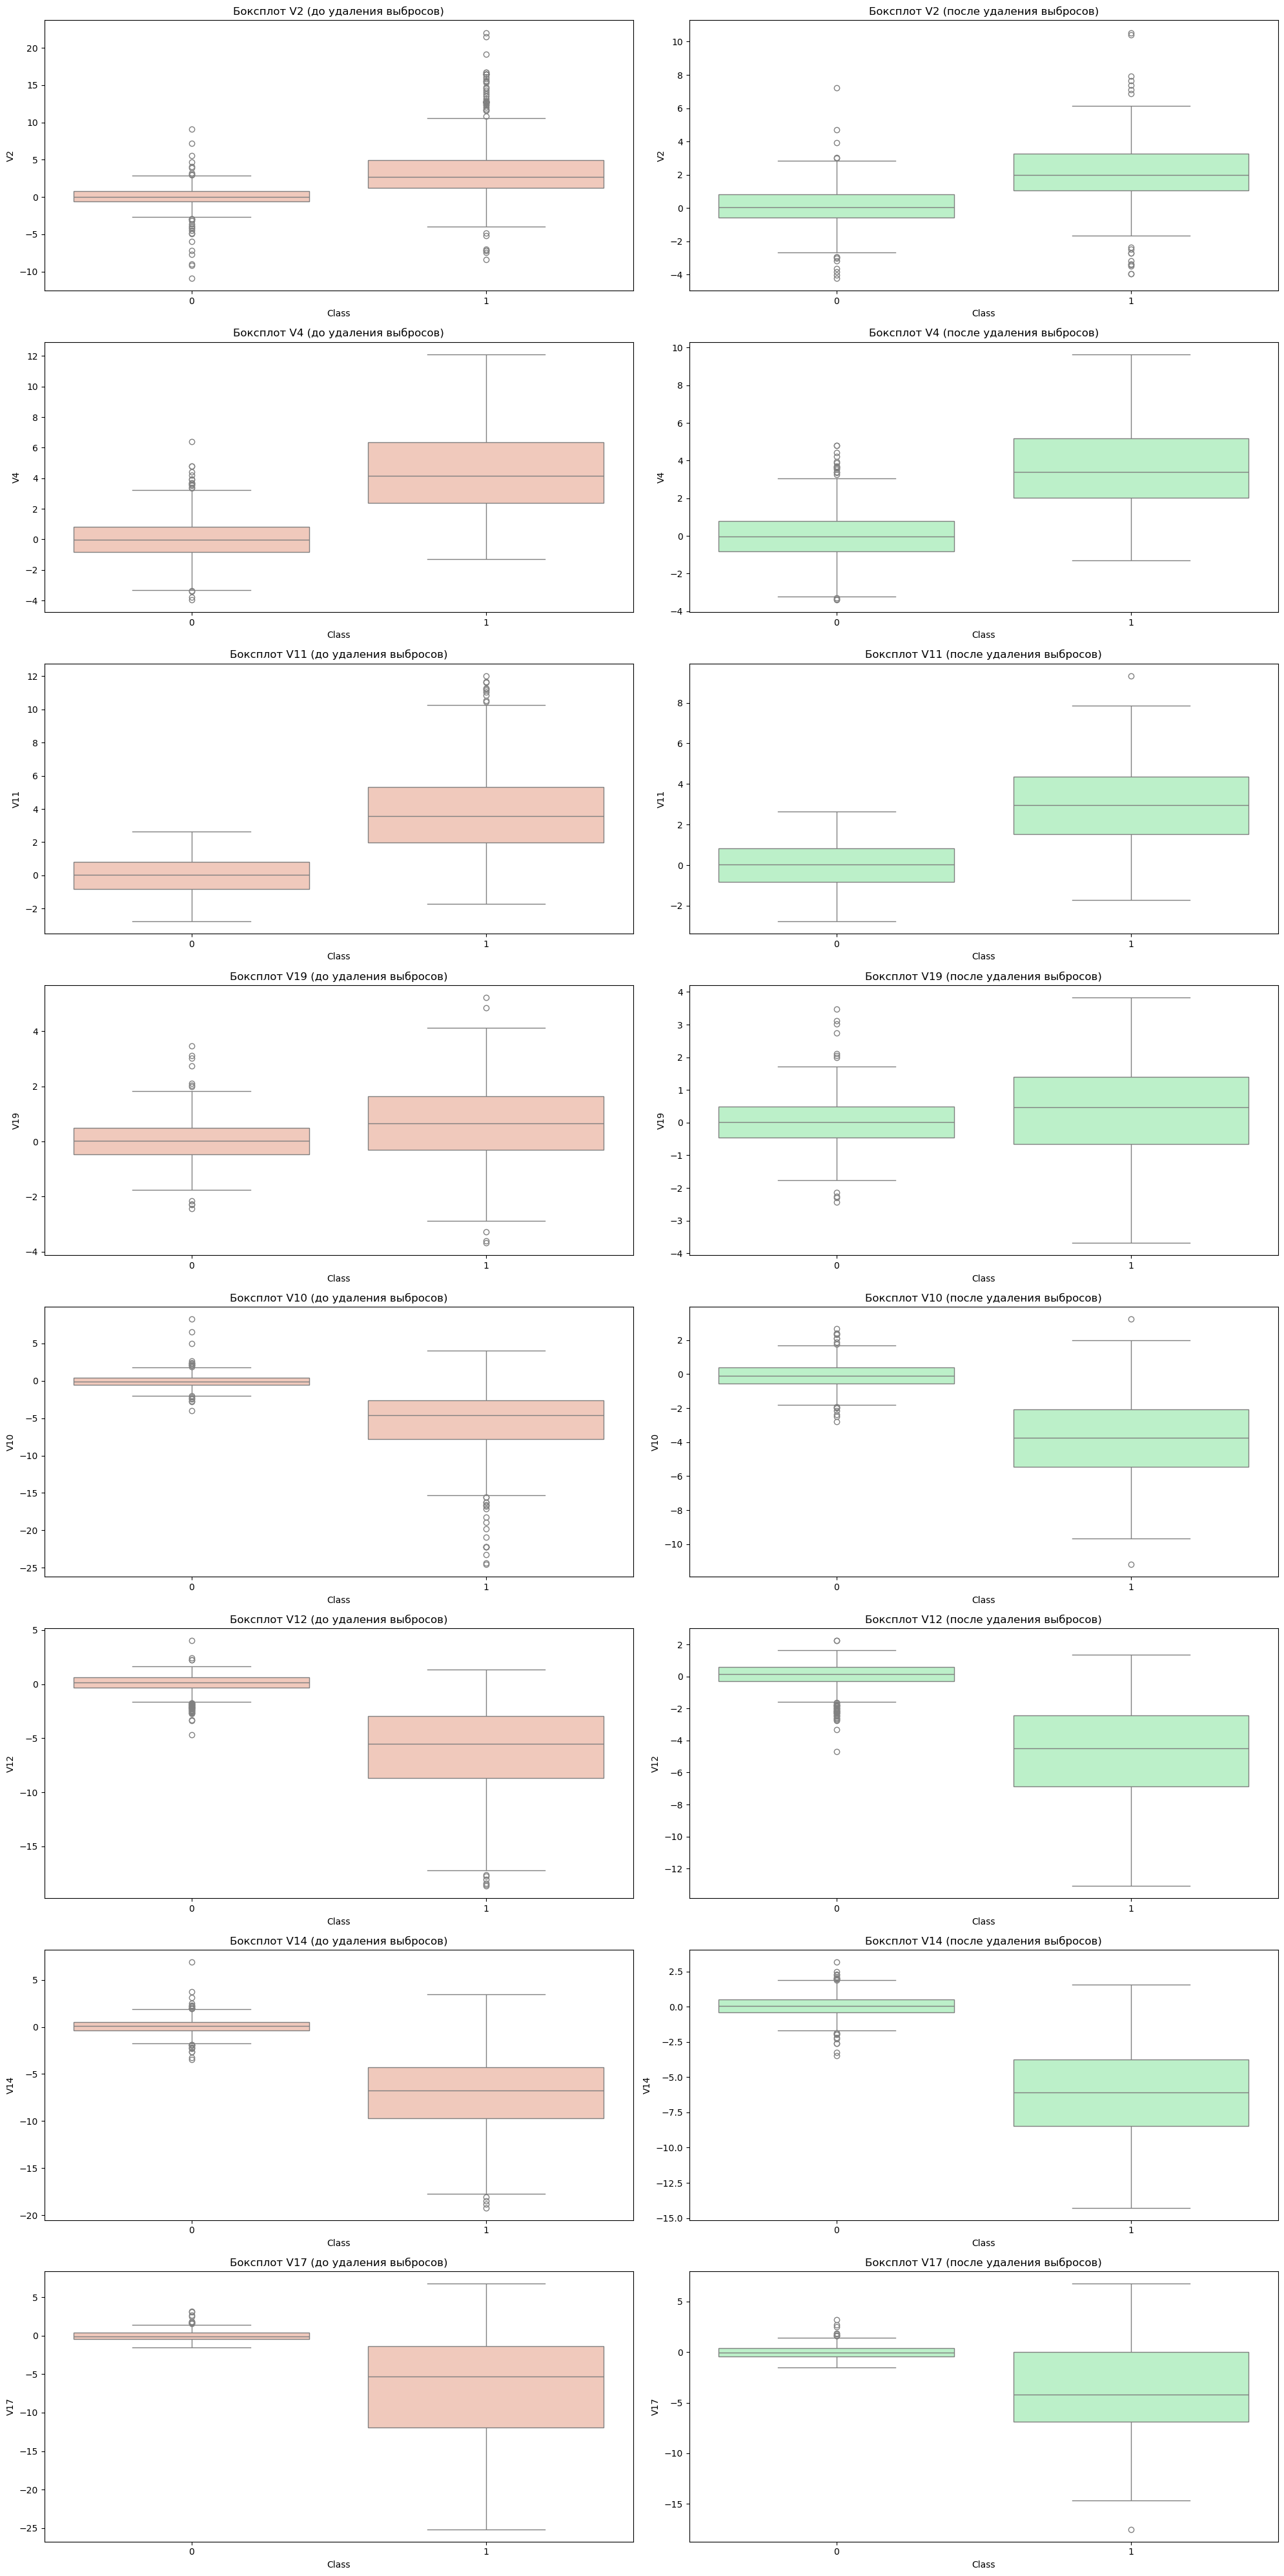

In [30]:
# Настройка графиков
f, ax = plt.subplots(8, 2, figsize=(20, 40))
colors = ['#B3F9C5', '#f9c5b3']

features = pos_corr_features + neg_corr_features

for i, feature in enumerate(features):
    # Боксплот до удаления выбросов
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax[i, 0], color=colors[1])
    ax[i, 0].set_title(f'Боксплот {feature} (до удаления выбросов)')

    # Боксплот после удаления выбросов
    sns.boxplot(x='Class', y=feature, data=df_without_outliers, ax=ax[i, 1], color=colors[0])
    ax[i, 1].set_title(f'Боксплот {feature} (после удаления выбросов)')

plt.tight_layout()
plt.show()

In [31]:
new_df = df_without_outliers

### Понижение размерности и кластеризация 

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X.drop(['Time','Amount'], axis=1, inplace=True) # Tак как Time и Amount не коррелируют почти с таргетом


# T-SNE алгоритм
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
svd = TruncatedSVD(n_components=2)
X_reduced_svd = svd.fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))

T-SNE заняло 2.7 сек
PCA заняло 0.0013 сек
Truncated SVD заняло 0.0019 сек


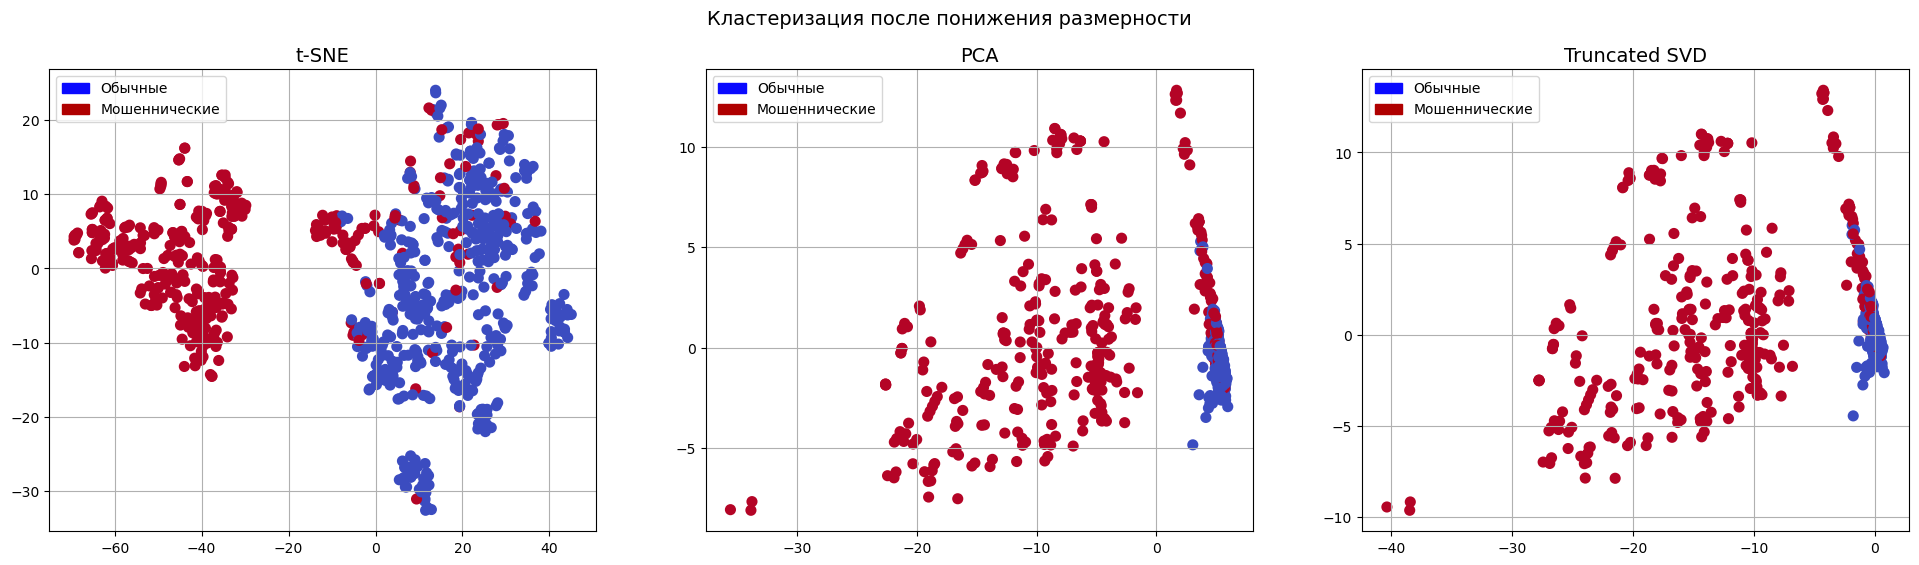

In [33]:
# Настройка графиков
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)

# Создаем легенду
blue_patch = mpatches.Patch(color='#0A0AFF', label='Обычные')
red_patch = mpatches.Patch(color='#AF0000', label='Мошеннические')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()